# Probabilities

For a given batch size, what is the probability that the next generated number is greater than `k`?

In [1]:
import pandas as pd
from math import comb

def calculate_probabilities(min_num: int, max_num: int) -> pd.DataFrame:
    data = []
    total_numbers = max_num - min_num + 1

    for k in range(min_num, max_num + 1):
        row = {}
        numbers_greater_than_k = max_num - k
        for batch_size in range(0, total_numbers + 1):
            favorable_combinations = comb(numbers_greater_than_k, batch_size)
            total_combinations = comb(total_numbers, batch_size)
            probability = favorable_combinations / total_combinations
            row[f'Batch Size {batch_size}'] = probability
        data.append(row)

    # Create a DataFrame
    df = pd.DataFrame(data, index=[f'k = {k}' for k in range(min_num, max_num + 1)])
    return df

# Parameters
min_num = 1
max_num = 10

# Generate the table
probability_table = calculate_probabilities(min_num, max_num)

# Display the table
probability_table.style.background_gradient(cmap='viridis', vmin=0, vmax=1)

,Batch Size 0,Batch Size 1,Batch Size 2,Batch Size 3,Batch Size 4,Batch Size 5,Batch Size 6,Batch Size 7,Batch Size 8,Batch Size 9,Batch Size 10
k = 1,1.000000,0.900000,0.800000,0.700000,0.600000,0.500000,0.400000,0.300000,0.200000,0.100000,0.000000
k = 2,1.000000,0.800000,0.622222,0.466667,0.333333,0.222222,0.133333,0.066667,0.022222,0.000000,0.000000
k = 3,1.000000,0.700000,0.466667,0.291667,0.166667,0.083333,0.033333,0.008333,0.000000,0.000000,0.000000
k = 4,1.000000,0.600000,0.333333,0.166667,0.071429,0.023810,0.004762,0.000000,0.000000,0.000000,0.000000
k = 5,1.000000,0.500000,0.222222,0.083333,0.023810,0.003968,0.000000,0.000000,0.000000,0.000000,0.000000
k = 6,1.000000,0.400000,0.133333,0.033333,0.004762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
k = 7,1.000000,0.300000,0.066667,0.008333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
k = 8,1.000000,0.200000,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
k = 9,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
k = 10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


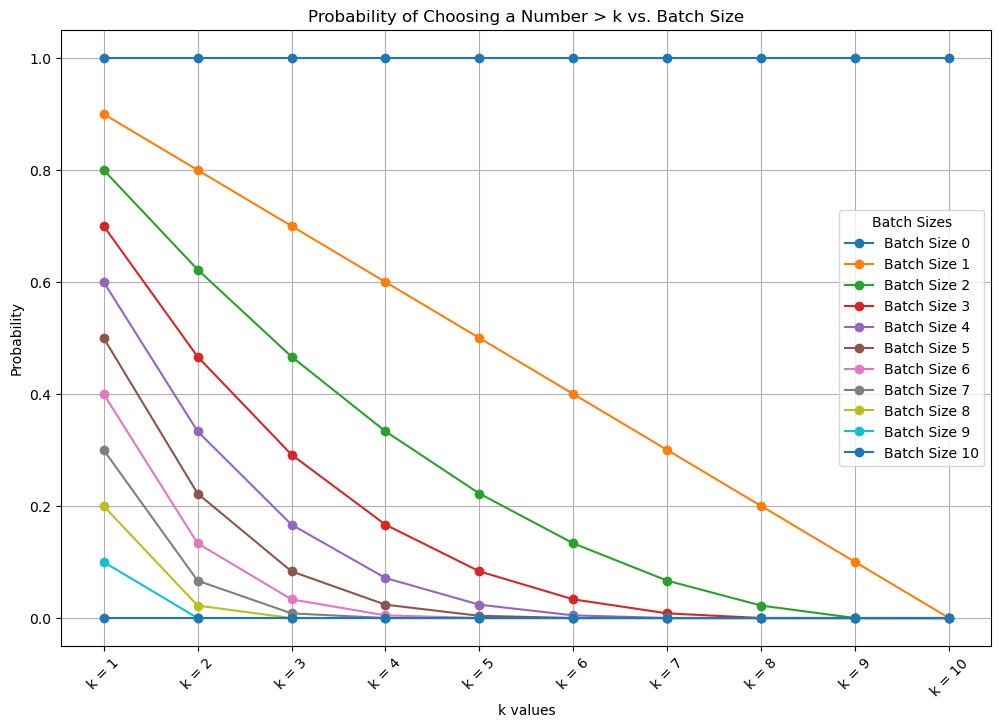

In [2]:
import matplotlib.pyplot as plt

# Plotting the line graph for the probability DataFrame
plt.figure(figsize=(12, 8))
for column in probability_table.columns:
    plt.plot(probability_table.index, probability_table[column], marker='o', label=column)

plt.title('Probability of Choosing a Number > k vs. Batch Size')
plt.xlabel('k values')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.legend(title='Batch Sizes')
plt.grid(True)
plt.show()